In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer teleco.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#drop customer id column
df.drop('customerID', axis= 1, inplace = True)

df.head()

In [4]:
#check the data types in our dataset 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From our dataset, we can see that the Total charges column is object, so we try and convert it to a int 

In [5]:
#converting the Total charges Column to int
pd.to_numeric(df.TotalCharges, errors ='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
#check if there are missing values in the Total Charges Column
pd.to_numeric(df.TotalCharges, errors ='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
#put it in a dataframe
df[pd.to_numeric(df.TotalCharges, errors ='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# check for the number of rows with missing values in the Total Charges column
df[pd.to_numeric(df.TotalCharges, errors ='coerce').isnull()].shape

(11, 20)

we have 11 rows with missing values

In [9]:
df.shape

(7043, 20)

dropping 11 rows out of 7043 rows in our dataset will not alter our analysis

In [10]:
#dropping the rows with missing values
df.iloc[488]['TotalCharges'] #----wants to verify  the firsts row with Missing values in the Total Charge column


' '

In [11]:
df1 = df[df.TotalCharges!= ' ']

In [12]:
df1.shape

(7032, 20)

In [13]:
#check the data type for the new variable
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
#convert Total charges to float
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [15]:
df1.TotalCharges.dtypes

dtype('float64')

The Total Charges Column is now converted to decimal numbers

In [16]:
#check for how many subscriber are leaving the company
df1[df1.Churn =='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [17]:
#check for the tenure of these subscribers
tenure_churn_no = df1[df1.Churn =='No'].tenure


In [18]:
#check for the tenure of customers who wants to leave the telecommuincation company
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure


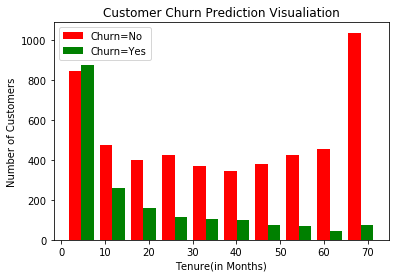

In [19]:
#viz our result in a histogram
plt.xlabel('Tenure(in Months)')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualiation")

plt.hist([tenure_churn_no,tenure_churn_yes], color =['red', 'green'], label=['Churn=No','Churn=Yes'])
plt.legend();

From our viz above, customers that have stayed with the company for a long time are less likely to leave the company. There over 800 subscribers that have stayed with the company for 5 years 10 months

In [20]:
# check how monthly charges affect churn 
monthly_churn_no = df1[df1.Churn =='No'].MonthlyCharges
monthly_churn_yes = df1[df1.Churn =='Yes'].MonthlyCharges

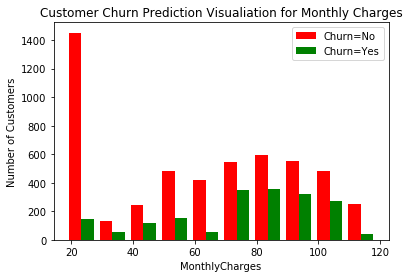

In [21]:
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualiation for Monthly Charges")

plt.hist([monthly_churn_no,monthly_churn_yes], color =['red', 'green'], label=['Churn=No','Churn=Yes'])
plt.legend();

Our Viz clearly tells us that the customers that pay more in charges are more likely to leave

In [22]:
#Viz for Customers with Partners
partner_churn_no = df1[df1.Churn =='No'].Partner
partner_churn_yes = df1[df1.Churn =='Yes'].Partner

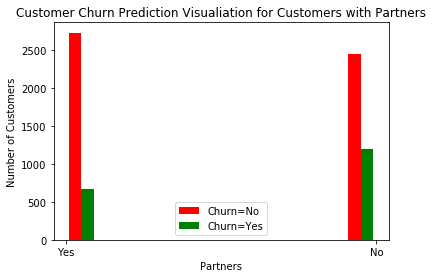

In [23]:
plt.xlabel('Partners')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualiation for Customers with Partners")

plt.hist([partner_churn_no, partner_churn_yes], color =['red', 'green'], label=['Churn=No','Churn=Yes'])
plt.legend();

Single Customers are likely going to leave the telecommuincation company than those who have a significant other

In [24]:
#print the columns names in the dataset
for columns in df1:
    print(columns)


gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [25]:
#print the unique values in each column using for loops
for columns in df1:
    print(df1[columns].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [26]:
#To further label each column and its unique values, i will use "python formatted string literals"
for column in df1:
        print(f'df1{column} : {df1[column].unique()}')


df1gender : ['Female' 'Male']
df1SeniorCitizen : [0 1]
df1Partner : ['Yes' 'No']
df1Dependents : ['No' 'Yes']
df1tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
df1PhoneService : ['No' 'Yes']
df1MultipleLines : ['No phone service' 'No' 'Yes']
df1InternetService : ['DSL' 'Fiber optic' 'No']
df1OnlineSecurity : ['No' 'Yes' 'No internet service']
df1OnlineBackup : ['Yes' 'No' 'No internet service']
df1DeviceProtection : ['No' 'Yes' 'No internet service']
df1TechSupport : ['No' 'Yes' 'No internet service']
df1StreamingTV : ['No' 'Yes' 'No internet service']
df1StreamingMovies : ['No' 'Yes' 'No internet service']
df1Contract : ['Month-to-month' 'One year' 'Two year']
df1PaperlessBilling : ['Yes' 'No']
df1PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
df1

In [27]:
#get the unique values for the categorical columns
for column in df1:
    if df1[column].dtype=='object':
        print(f'{column} : {df1[column].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [28]:
#put the above code in a function
def print_unique_col_values(df1):
    for column in df1:
     if df1[column].dtypes=='object':
        print(f'{column} : {df1[column].unique()}')


In [29]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


 <h3> Further cleaning of the data:</h3> 
 <h3> Here, i am going to the replace the 'No Internet Servic' in the Online security  column with 'No'.</h3>
 <h3>  Same applies to Multiple Line Service,OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies columns</h3>

In [30]:
df1.replace('No phone service','No', inplace =True)
df1.replace('No internet service', 'No', inplace = True)




In [31]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [39]:
#convert the yes and no strings(text) in the categorucal column  to 1, 0 so that our machine learning model can understand our values
yes_no = ['Partner','Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','PaperlessBilling']

for columns in yes_no:
    df1[columns].replace({'Yes':1, 'No':0}, inplace = True)

In [41]:
for columns in df1:
    print(f'{columns} : {df1[columns].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [47]:
for columns in yes_no:
    df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [48]:
for columns in df1:
    print(f'{columns} : {df1[columns].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [52]:
#convert columns with more two unique values using one hot encoding(resources: codebasics one hot encoding)
#uisng one hot enconding for the internet service column
df2 = pd.get_dummies(data=df1, columns =['InternetService', 'Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [53]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [68]:
#scaling our datatypes. we are going to scale the non zeros and one columns
cols_to_scale =['tenure', 'MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [69]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6644,0,0,1,0,0.845070,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3213,1,0,1,1,0.563380,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
3786,0,0,1,1,0.366197,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [70]:
#label our x and y axis
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [98]:
#split 20% of the dataset for testing and 20% for  training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=66)


In [99]:
x_train.shape 

(5625, 26)

In [100]:
x_test.shape

(1407, 26)

In [101]:
len(x_train.columns)

26

our training datatset has 26 columns for the x axis because we dropped the "Churn Column"

In [102]:
#importing the TensorFlow lib to create a nueral network
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape =(26,), activation ='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])
model.fit(x_train, y_train, epochs =100)

Epoch 1/100
5625/5625 [==============================] - 1s 152us/sample - loss: 0.5772 - acc: 0.6793
Epoch 2/100
5625/5625 [==============================] - 1s 125us/sample - loss: 0.4514 - acc: 0.7669
Epoch 3/100
5625/5625 [==============================] - 1s 125us/sample - loss: 0.4339 - acc: 0.7868
Epoch 4/100
5625/5625 [==============================] - 1s 125us/sample - loss: 0.4286 - acc: 0.7961
Epoch 5/100
5625/5625 [==============================] - 1s 112us/sample - loss: 0.4260 - acc: 0.7988
Epoch 6/100
5625/5625 [==============================] - 1s 137us/sample - loss: 0.4238 - acc: 0.7988
Epoch 7/100
5625/5625 [==============================] - 1s 125us/sample - loss: 0.4229 - acc: 0.7998
Epoch 8/100
5625/5625 [==============================] - 1s 125us/sample - loss: 0.4212 - acc: 0.8032
Epoch 9/100
5625/5625 [==============================] - 1s 123us/sample - loss: 0.4212 - acc: 0.8000
Epoch 10/100
5625/5625 [==============================] - 1s 124us/sample - loss: 

In [103]:
model.evaluate(x_test, y_test)

1407/1407 [==============================] - 0s 70us/sample - loss: 0.4087 - acc: 0.8010


[0.4086680578778802, 0.80099505]

In [104]:
#ready to test my data
yp= model.predict(x_test)
yp[:7]

array([[0.13574964],
       [0.07964656],
       [0.20544791],
       [0.5041336 ],
       [0.65864176],
       [0.06692171],
       [0.9023864 ]], dtype=float32)

In [105]:
y_test[:10]

1754    0
5773    0
5644    1
5130    1
818     1
1300    0
6866    1
2483    1
4550    0
4225    0
Name: Churn, dtype: int64

In [106]:
#convert the arrays of numbers in the yp_model predict into 0s and 1s using a for loop.This will enable us to compare values in y_test
#values greater than 0.5 is 1, while numbers less than 0.5 is 0
y_pred =[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    


In [107]:
 y_pred[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

In [108]:
#Classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1046
           1       0.64      0.51      0.57       361

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [109]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [110]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');


ValueError: Must pass 2-d input. shape=()

<Figure size 720x504 with 0 Axes>